In [1]:
import cv2
import sys
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def imgshow(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [3]:
img = cv2.imread('lenna.bmp')

kernel = np.ones((5,5),np.uint8) 


In [4]:
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7),0)
imgCanny = cv2.Canny(img, 150,200) # edge 추출
imgDialation = cv2.dilate(imgCanny,kernel, iterations = 1) # edge 굵기 변경 -> 얇게
imgEroded = cv2.erode(imgDialation, kernel, iterations = 1) # edge 굵기 변경 -> 굵게

In [5]:
# cv2.imshow("Gray Image", imgGray)
# cv2.imshow("Blur Image", imgBlur)
# cv2.imshow("Canny Image", imgCanny)
# cv2.imshow("Dialation Image", imgDialation)
# cv2.imshow("Eroded Image", imgEroded)
# cv2.waitKey(0)

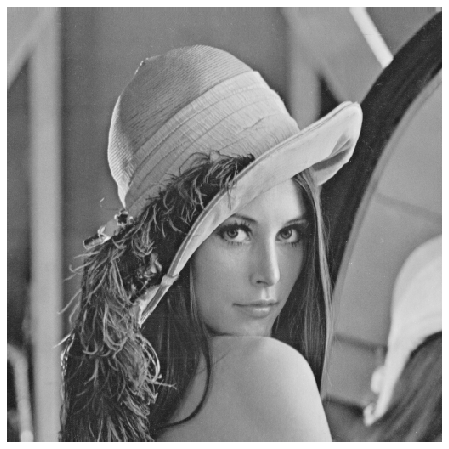

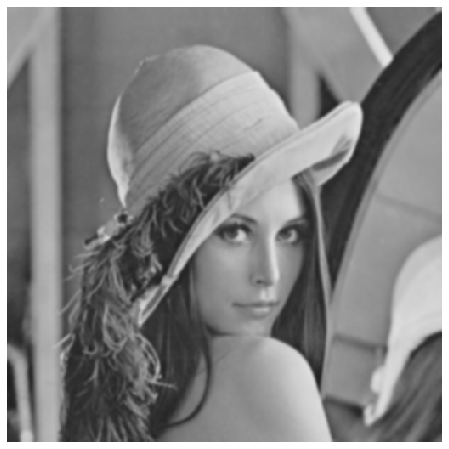

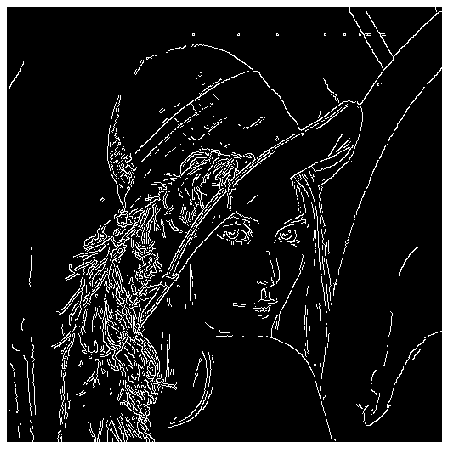

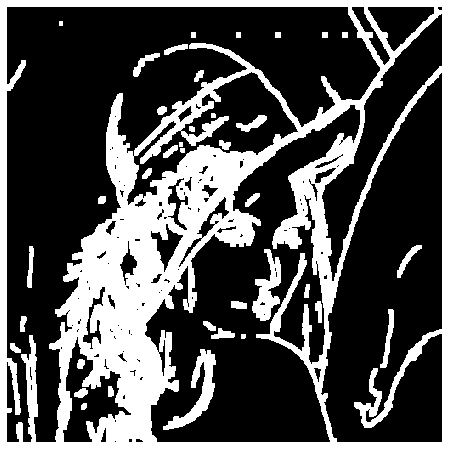

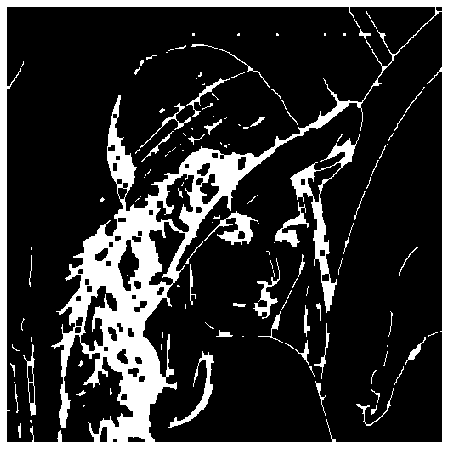

In [6]:
imgshow(imgGray)
imgshow(imgBlur)
imgshow(imgCanny)
imgshow(imgDialation)
imgshow(imgEroded)

#### 이미지 사이즈 변경

In [7]:
img = cv2.imread('lenna.bmp')
print(img.shape)

(512, 512, 3)


In [8]:
imgResize= cv2.resize(img,(1000,500))
print(imgResize.shape)

(500, 1000, 3)


In [9]:
imgCropped = img[0:200,200:500]

In [10]:
# cv2.imshow("Image", img)
# cv2.imshow("Image Cropped", imgCropped)
# cv2.imshow("Image Resize", imgResize)

# cv2.waitKey(0)

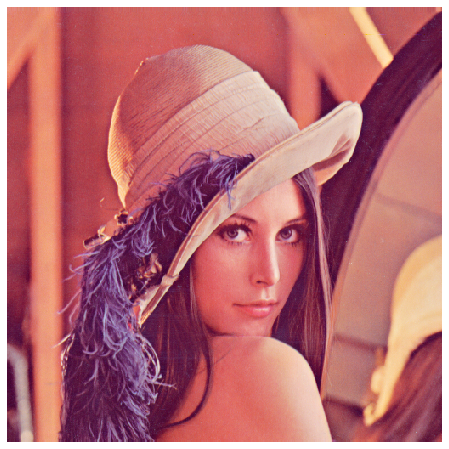

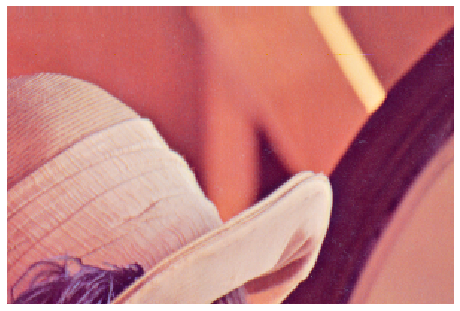

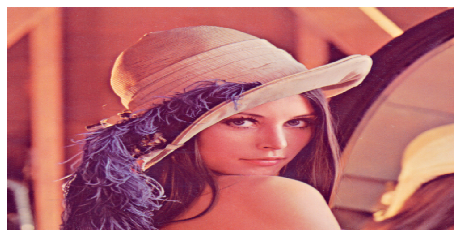

In [11]:
imgshow(img)
imgshow(imgCropped)
imgshow(imgResize)

#### 도형 그리기

In [12]:
img = np.zeros((512,512,3),np.uint8)

In [13]:
cv2.line(img,(0,0),(img.shape[1],img.shape[0]),(0,255,0),3) # 선, width, height 순서 주의
cv2.rectangle(img,(0,0),(250,350),(0,0,255),2)
cv2.circle(img,(400,50),30,(255,255,0),5)
cv2.putText(img,"OPENCV",(300,200),cv2.FONT_HERSHEY_COMPLEX,1,(0,150,0),3)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0, 255,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [14]:
# cv2.imshow("Image",img3)
# cv2.waitKey(0)

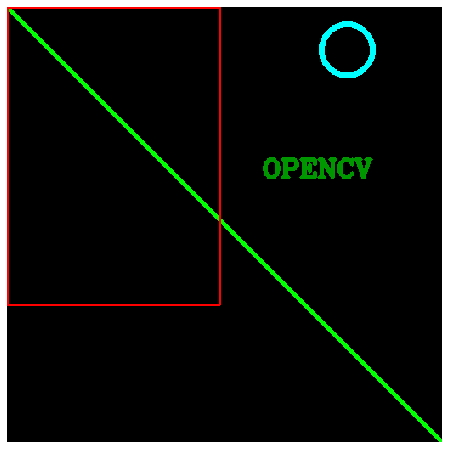

In [15]:
imgshow(img)

#### 기하학 변환

https://076923.github.io/posts/Python-opencv-19/

- cv2.getPerspectiveTransform(원본 좌표 순서, 결과 좌표 순서)
- cv2.warpPerspective(원본 이미지, 매트릭스, (결과 이미지 너비, 결과 이미지 높이))

In [16]:
img = cv2.imread("card.jpg")

In [17]:
width,height = 250,350

pts1 = np.float32([[111,219],[287,188],[154,482],[352,440]]) # 이미지 열어서 뽑아내고 싶은 부분 좌표 확인하기
pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]]) 
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))

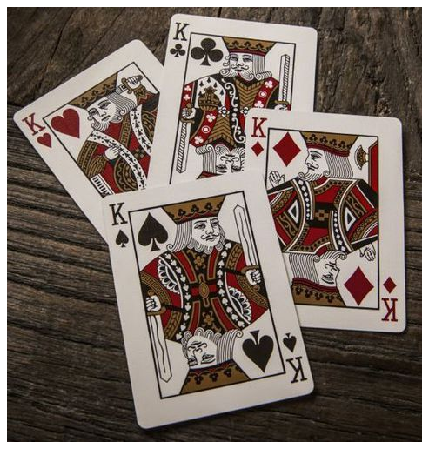

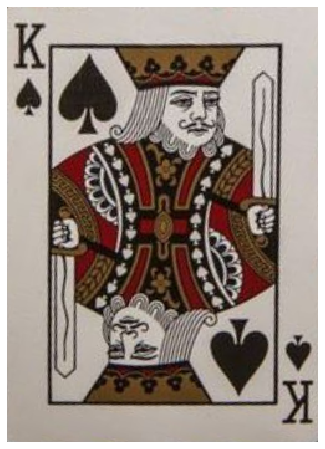

In [18]:
imgshow(img)
imgshow(imgOutput)

In [2]:
def empty(a):
    pass

In [3]:
path = 'lambo.png'

cv2.namedWindow("TrackBars")
cv2.resizeWindow("TrackBars", 640,240)
cv2.createTrackbar("Hue Min", "TrackBars", 0,179,empty)
cv2.createTrackbar("Hue Max", "TrackBars", 19,179,empty)
cv2.createTrackbar("Sat Min", "TrackBars", 110,255,empty)
cv2.createTrackbar("Sat Max", "TrackBars", 240,255,empty)
cv2.createTrackbar("Val Min", "TrackBars", 153,255,empty)
cv2.createTrackbar("Val Max", "TrackBars", 255,255,empty)

while True:
    img = cv2.imread(path)
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h_min = cv2.getTrackbarPos("Hue Min", "TrackBars")
    h_max = cv2.getTrackbarPos("Hue Max", "TrackBars")
    s_min = cv2.getTrackbarPos("Sat Min", "TrackBars")
    s_max = cv2.getTrackbarPos("Sat Max", "TrackBars")
    v_min = cv2.getTrackbarPos("Val Min", "TrackBars")
    v_max = cv2.getTrackbarPos("Val Max", "TrackBars")
    print(h_min, h_max, s_min, s_max, v_min, v_max)
    lower = np.array([h_min, s_min, v_min])
    upper = np.array([h_max, s_max, v_max])
    mask = cv2.inRange(imgHSV, lower, upper)
    imgResult = cv2.bitwise_and(img, img, mask = mask)
    cv2.imshow("Original", img)
    cv2.imshow("HSV", imgHSV)
    cv2.imshow("Mask", mask)
    cv2.imshow("Result", imgResult)
    
    if cv2.waitKey(1) == 27:
        break
        
cv2.destroyAllWindows()

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 

0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 153 255
0 19 110 240 

#### Face detect 

- https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220699662173&proxyReferer=https:%2F%2Fwww.google.com%2F

In [4]:
# Haar-Cascade 트레이닝 데이터 불러오기
faceCascade = cv2.CascadeClassifier("./haarcascades/haarcascade_frontalface_default.xml")

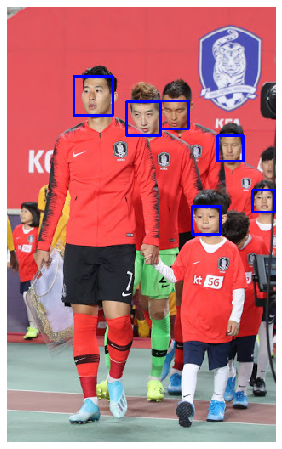

In [26]:
img = cv2.imread('foot3.jpg')
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(imgGray, 1.1,4) # ScaleFactor, minNeighbor 

for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y), (x+w, y+h),(255,0,0),2)
    
imgshow(img)

In [19]:
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    imgGray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(imgGray, 1.1,4)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y), (x+w, y+h),(255,0,0),2)
        
    cv2.imshow('Video', frame)
    
    if cv2.waitKey(1) == 27:
        break
        
video_capture.release()
cv2.destroyAllWindows()


#### Number Plate

In [21]:
nPlateCascade = cv2.CascadeClassifier("./haarcascades/haarcascade_russian_plate_number.xml")
minArea = 200
color = (255,0,255)

In [23]:
img = cv2.imread("car3.jpg")
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
numberPlates = nPlateCascade.detectMultiScale(imgGray, 1.1,10)

for (x,y,w,h) in numberPlates:
    area = w*h
    if area > minArea:
        cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,255),2)
        cv2.putText(img, "Number Plate", (x,y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, color, 2)
        imgRoi = img[y:y + h, x:x + w]
        cv2.imshow("ROI", imgRoi)
        
        cv2.imshow("Result",img)
        cv2.waitKey(1000)
        
        cv2.imwrite("NoPlate.jpg", imgRoi)
        cv2.rectangle(img, (0,200), (640,400), (0,255,0), cv2.FILLED)
        cv2.putText(img, "Scan Saved", (150,265), cv2.FONT_HERSHEY_DUPLEX, 2, (0,0,255), 2)
        cv2.imshow("Result", img)
        cv2.waitKey(0)
    

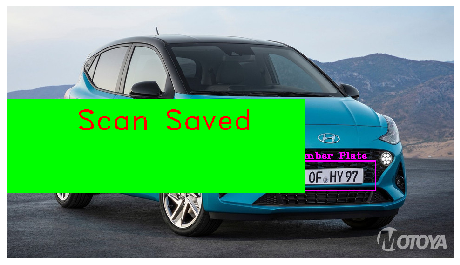

In [24]:
imgshow(img)

#### Object detect

In [3]:
def stackImages(scale, imgArray):
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    width = imgArray[0][0].shape[1]
    height = imgArray[0][0].shape[0]
    if rowsAvailable:
        for x in range(0, rows):
            for y in range(0, cols):
                if imgArray[x][y].shape[:2] == imgArray[0][0].shape[:2]:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (0, 0), None, scale, scale)
                else:
                    imgArray[x][y] = cv2.resize(imgArray[x][y], (imgArray[0][0].shape[1], imgArray[0][0].shape[0]),
                                                None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y] = cv2.cvtColor(imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((height, width, 3), np.uint8)
        hor = [imageBlank] * rows
        hor_con = [imageBlank] * rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
        ver = np.vstack(hor)
    else:
        for x in range(0, rows):
            if imgArray[x].shape[:2] == imgArray[0].shape[:2]:
                imgArray[x] = cv2.resize(imgArray[x], (0, 0), None, scale, scale)
            else:
                imgArray[x] = cv2.resize(imgArray[x], (imgArray[0].shape[1], imgArray[0].shape[0]), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor = np.hstack(imgArray)
        ver = hor
    return ver

In [4]:
def getContours(img):
    contours, hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area > 500:
            cv2.drawContours(imgContour, cnt, -1, (255,0,0), 3)
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
            print(len(approx))
            objCor = len(approx)
            x,y,w,h = cv2.boundingRect(approx)
            
            if objCor == 3:
                objectType = "Tri"
            elif objCor == 4:
                aspRatio = w/float(h)
                if aspRatio > 0.98 and aspRatio <1.03:
                    objectType = "Square"
                else:
                    objectType = "Rectangle"
            elif objCor > 4:
                objectType = "Circles"
            else:
                objectType = "None"
                
            cv2.rectangle(imgContour, (x,y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(imgContour, objectType, (x+(w//2)-10, y+(h//2)-10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0,0,0),2)

In [6]:
path = 'shapes.png'
img = cv2.imread(path)
imgContour = img.copy()

imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgBlur = cv2.GaussianBlur(imgGray, (7,7),1)
imgCanny = cv2.Canny(img, 50,50)
getContours(imgCanny)
imgBlank = np.zeros_like(img)
imgStack = stackImages(0.8,([img, imgGray, imgBlur],[imgCanny, imgContour, imgBlank]))
cv2.imshow("Stack", imgStack)
cv2.waitKey(0)

3525.5
8
8556.0
4
10401.0
4
10196.5
8
1597.5
3
10401.0
4
6281.5
4
5601.0
3
3478.0
4
2272.0
4
3516.5
8
8553.0
4
2550.0
4
5621.0
3
10186.0
8
5688.0
3


-1

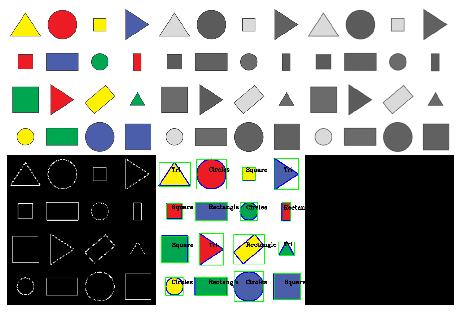

In [31]:
imgshow(imgStack)

#### Document scanner

In [4]:
widthImg = 540
heightImg = 640

cap = cv2.VideoCapture(0)
cap.set(10,150)

def preProcessing(img):
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (5,5),1)
    imgCanny = cv2.Canny(imgBlur, 200, 200)
    kernel = np.ones((5,5))
    imgDial = cv2.dilate(imgCanny, kernel, iterations = 2)
    imgThres = cv2.erode(imgDial, kernel, iterations =1)
    return imgThres

def getContours(img):
    biggest = np.array([])
    maxArea = 0
    contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        print(area)
        if area > 5000:
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.02*peri, True)
            if area > maxArea and len(approx) == 4:
                biggest = approx
                maxArea = area
    cv2.drawContours(imgContour, biggest, -1, (255,0,0),20)
    return biggest

def reorder(myPoints):
    myPoints = myPoints.reshape((4,2))
    myPointsNew = np.zeros((4,1,2), np.int32)
    add = myPoints.sum(1)
    
    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis = 1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]
    
    return myPointsNew

def getWarp(img, biggest):
    biggest = reorder(biggest)
    pts1 = np.float32(biggest)
    pts2 = np.float32([[0,0],[widthImg,0],[0,heightImg],[widthImg,heightImg]])
    matrix = cv2.getPerspectiveTransform(pts1,pts2)
    imgOutput = cv2.warpPerspective(img,matrix,(widthImg,heightImg))
    imgCropped = imgOutput[20:imgOutput.shape[0]-20, 20:imgOutput.shape[1]-20]
    imgCropped = cv2.resize(imgCropped, (widthImg, heightImg))
    
    return imgCropped

In [5]:
while True:
    success, img = cap.read()
    img = cv2.resize(img, (widthImg, heightImg))
    imgContour = img.copy()
    
    imgThres = preProcessing(img)
    biggest = getContours(imgThres)
    if biggest.size != 0:
        imgWarped = getWarp(img, biggest)
        imageArray = ([img, imgThres], [imgContour, imgWarped])
        cv2.imshow("ImageWarped", imgWarped)
    else:
        imageArray = ([imgContour, img])
    stackedImages = stackImages(0.6, imageArray)
    cv2.imshow("WorkFlow", stackedImages)
    
    if cv2.waitKey(1) == 27:
        break

517.5
42.5
283.5
139.5
760.0
401.5
24.0
97.5
113.0
247.0
1063.5
33.5
570.0
672.5
16.0
324.0
2564.5
110.0
67.5
1077.5
161.5
64.0
16.0
274.5
528.0
344.5
605.5
41.5
516.0
293.5
126.0
400.5
24.0
849.5
112.5
237.0
1064.0
20.0
531.0
648.0
36.0
323.0
2583.0
68.0
1071.5
62.0
132.5
128.0
16.0
290.5
502.0
16.0
347.5
613.5
512.5
41.5
298.5
124.5
724.5
365.5
24.0
85.5
125.0
255.5
1062.5
664.0
641.0
68.0
44.0
329.0
29.0
2569.0
109.0
1071.5
132.5
32.0
16.0
16.0
286.0
547.0
359.5
580.0
518.0
41.5
298.5
141.0
711.5
360.5
24.0
47.0
109.0
272.0
1061.5
634.5
669.5
72.0
16.0
324.0
2551.5
93.0
61.5
1090.0
127.5
92.0
533.0
658.5
587.0
531.5
49.5
287.5
128.0
394.5
24.0
802.5
122.0
258.5
1059.0
597.5
670.0
60.0
16.0
336.0
2558.0
105.0
59.0
1052.0
153.5
670.0
706.5
582.0
531.5
49.5
289.0
146.0
710.5
364.5
24.0
78.5
104.0
255.0
1063.0
24.5
530.0
664.0
24.0
44.0
20.0
332.0
2555.0
149.0
50.5
1061.0
153.5
72.0
16.0
286.5
483.5
20.0
389.5
586.0
521.0
41.5
285.5
123.5
714.5
402.5
24.0
49.5
132.0
262.5
1057.0
647.0
6

56.0
530.0
276.5
194.0
396.0
24.0
843.0
108.0
155.5
1058.0
573.5
675.5
36.0
330.0
1189.0
24.0
41.0
1065.5
128.5
72.0
16.0
266.5
533.0
352.5
592.0
51.5
532.5
276.0
185.0
368.0
24.0
819.5
141.0
234.5
1063.0
648.5
588.5
28.0
28.0
328.0
2572.5
104.0
43.0
1070.5
128.0
72.0
285.0
531.0
369.5
616.0
42.5
530.5
280.5
167.5
368.5
24.0
838.5
139.0
235.0
1054.5
565.0
658.5
28.0
28.0
329.0
1204.0
108.5
39.0
1048.5
127.5
68.0
270.5
543.0
388.5
586.5
49.5
517.5
279.5
168.0
368.5
24.0
849.5
113.0
251.0
1060.0
583.5
20.0
20.0
16.0
334.0
2560.5
107.0
61.5
1782.5
158.5
16.0
68.0
16.0
278.0
525.0
392.5
578.0
60.5
511.5
281.5
175.0
368.0
24.0
851.0
142.0
237.5
1055.0
28.0
647.5
585.5
16.0
333.0
1159.0
96.0
57.5
1069.5
127.5
72.0
20.0
16.0
16.0
530.5
678.5
579.5
50.5
522.0
276.5
161.5
397.0
24.0
854.5
133.0
197.0
1061.5
597.0
657.0
16.0
327.0
1178.5
80.0
52.5
1051.0
158.0
72.0
261.5
541.0
365.0
581.0
56.0
514.0
281.5
153.0
368.5
24.0
861.5
108.0
221.0
1061.0
562.5
670.5
16.0
336.0
2578.5
136.0
43.0
1061.0
1

1059.0
125.0
24.0
20.0
269.0
671.5
24.0
401.0
577.0
37.5
88.0
510.5
328.5
48.0
627.5
76.5
369.5
28.5
104.0
24.0
208.0
1045.0
33.5
32.0
619.5
755.0
66.5
320.5
2569.0
1085.5
29.0
135.5
16.0
852.5
28.0
647.0
596.0
36.5
96.5
508.5
312.5
41.5
646.5
368.0
132.0
24.0
106.0
219.0
1049.0
37.5
582.5
20.0
764.5
62.0
332.5
33.0
1185.5
16.0
1069.0
36.0
111.5
16.0
28.0
56.5
781.5
677.0
585.5
91.5
524.0
301.0
50.5
709.0
352.5
123.0
20.0
48.0
220.0
1046.5
684.5
20.0
759.0
81.0
318.5
28.0
16.0
2573.0
32.0
1059.5
120.0
24.0
56.0
20.0
274.0
682.5
350.0
561.5
28.0
96.5
510.0
335.5
42.5
654.5
369.0
151.5
20.0
100.0
1045.5
219.0
42.0
595.5
24.0
738.0
58.5
16.0
318.5
2574.5
73.0
1063.0
115.0
24.0
216.0
268.0
608.5
28.0
367.0
585.5
32.0
84.0
502.5
312.5
41.5
625.5
371.5
109.5
104.0
24.0
219.0
1039.5
670.5
44.0
714.0
32.0
326.5
2568.5
20.0
1075.0
119.5
20.0
20.0
56.0
16.0
294.5
652.0
32.0
348.0
585.5
32.0
76.5
505.0
336.0
47.0
639.0
347.5
128.0
100.0
20.0
219.5
1040.0
660.5
32.0
746.0
69.0
33.5
333.5
2638.5
10